In [1]:
from raytracing.raytracing_lib import RayTracing
import numpy as np
import pandas as pd
from numpy import linspace, isnan, array
import matplotlib.pyplot as plt
%matplotlib widget

import warnings
warnings.filterwarnings("ignore", message=".*delta_grad == 0.0.*")

In [2]:
from numpy import pi, argwhere, mean, round, ones, argsort, cumsum, rad2deg, deg2rad, sqrt, inf,errstate, where,sign, nan, tan, array, dot, arccos, degrees,arctan, nan, full, isnan,vstack,linspace, isfinite,arcsin, argmin,random,linalg,clip, cos, sin
from scipy.optimize import minimize_scalar, minimize,newton, brentq, least_squares
from math import isclose
from pandas import DataFrame,MultiIndex
from matplotlib.pyplot import subplots,show,grid
from scipy.interpolate import interp1d

In [3]:
wl= 1
r= 5
dist=10
dist_after= 100
R=50
t=6
ap= 20
t_ast=5
object_height=2*0
reverse=False
RT= RayTracing(object_height=object_height, wl_um=wl,beam_radius=r, Obj_2_Ent_tickness=dist,Ent_thickness=t_ast)

RT.add_Lens_ZMX('LA1951', thickness_after=35, reverse=reverse)
RT.add_Lens_ZMX('LA1951', thickness_after=40, reverse= not reverse)

# RT.set_Stop(1.5, 1)
RT.set_Stop(1.5, 2)
# RT.set_Stop(1.5, 3)
# RT.set_Stop(1.5, 4)


(-25.0, 25.0)

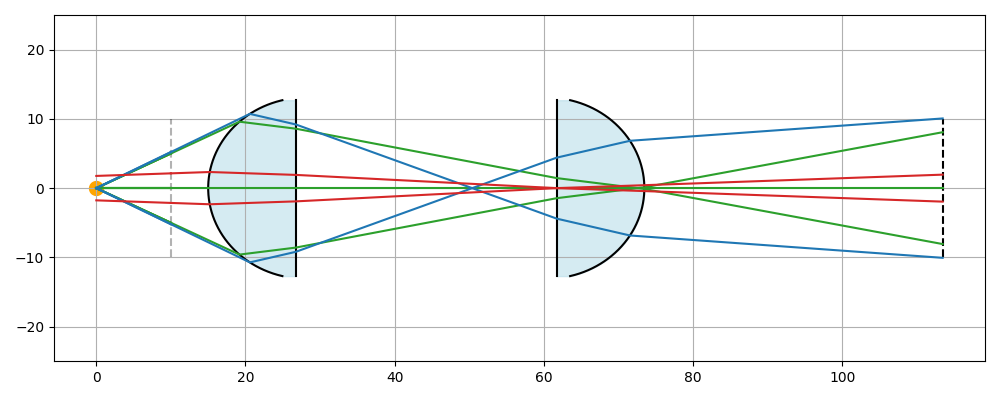

In [8]:
fig,ax= plt.subplots(figsize=(10,4), tight_layout=True)

lens_layout=True
ST_Active=False
show_obj= True
xscale='linear'
yscale='linear'

fig,ax, Results= RT.Plot_System(fig,ax, 3,ST_Active=ST_Active, show_obj= show_obj,xscale=xscale, yscale=yscale,
                                solver= 'default',ray_color='tab:green', lens_layout=True)

fig,ax, Results= RT.Plot_System(fig,ax, 4,  ST_Active=ST_Active, show_obj= show_obj,xscale=xscale, yscale=yscale,
                                solver= 'marginal',ray_color='tab:blue', lens_layout= not lens_layout, marginal_ang_tol=1e-8)

fig,ax, Results= RT.Plot_System(fig,ax, 4, ST_Active=ST_Active, show_obj= show_obj,xscale=xscale, yscale=yscale,
                                solver= 'chief',ray_color='tab:red', lens_layout= not lens_layout, marginal_ang_tol=1e-8, FOV_deg=10, chief_guess=0)

# fig,ax, Results= RT.Plot_System(fig,ax, 1, ST_Active=False, show_obj= True,xscale='linear', yscale='linear',
# solver= 'arbitrary',ray_color='orange', lens_layout=False, y_mm=5.21, h_obj= 0) #u_rad= 0.08217798084502662+1e-3, h_obj=0)

ax.set_ylim(-25,25)

In [5]:
RT.AST_surface

'surf4'

In [6]:
RT.y_chief

2.1352421338023486